# Анализ продаж компьютерных игр

## Описание проекта

Исследуемый интернет-магазин продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Цель исследования - выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании. Перед нами данные до 2016 года. Необходимо спланировать работу компании на 2017 год. 

## Изучение данных из файла

Перед началом исследования необходимо убедиться в корректности предоставленной информации. Откроем таблицу и изучим данные:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
import seaborn as sns
try:
    df = pd.read_csv('games.csv')
except:
    df = pd.read_csv('/datasets/games.csv')
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Выведем общую информацию о таблице:

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


## Предобработка данных

### Переименование столбцов

Приведем названия столбцов к единому виду (нижнему регистру). 

In [2]:
df.columns = df.columns.str.lower()
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


### Заполнение пропусков

Проверим наличие пропусков в таблице:

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Имеются пропуски в следующих столбцах: `year_of_release`, `critic_score`, `user_score`, `rating`. Год релиза не указан в 269 играх, это примерно 1.6 % данных, на результат исследования данное количество игр не повлияет, поэтому можно их удалить.

В столбцах `critic_score`, `user_score`, `rating` достаточно много пропущенных значений. Заполнение медианным или средним значением может кардинально повлиять на результат исследования. Оценка - это индивидуальный показатель, который не привязать к какой-нибудь зависимости. Оставим пропущенные значения в данных столбцах.

Среди оценок пользователей наблюдается значение "tbd", что скорее всего обозначает "To be determined/decided" (рейтинг не известен). Для удобства работы с данными заменим это значение на нейтральное, например -1.

In [3]:
df.loc[df['user_score'] == 'tbd', 'user_score'] = '-1' # замена значений в столбце user_score
df = df.dropna(subset = ['year_of_release']).reset_index(drop = True) # удаление строк с пропусками в столбце year_of_release
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16446 entries, 0 to 16445
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16446 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16446 non-null  float64
 5   eu_sales         16446 non-null  float64
 6   jp_sales         16446 non-null  float64
 7   other_sales      16446 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   object 
 10  rating           9768 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Данные в столбце rating имеют категориальные значения. Заполним пропуски значением "Unknown".

In [4]:
df['rating'] = df['rating'].fillna('Unknown')

### Преобразование типов данных

Приведем значения столбца `year_of_release` к целочисленному типу данных, а значения user_score к типу "float64".

In [5]:
df['year_of_release'] = df['year_of_release'].astype('int')
df['user_score'] = df['user_score'].astype('float')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16446 entries, 0 to 16445
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16446 non-null  object 
 2   year_of_release  16446 non-null  int32  
 3   genre            16444 non-null  object 
 4   na_sales         16446 non-null  float64
 5   eu_sales         16446 non-null  float64
 6   jp_sales         16446 non-null  float64
 7   other_sales      16446 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   float64
 10  rating           16446 non-null  object 
dtypes: float64(6), int32(1), object(4)
memory usage: 1.3+ MB


Посчитаем суммарные продажи во всех регионах. Полученные данные отразим в столбце `sum_sales`.

In [6]:
df['sum_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,Unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,Unknown,31.38


## Исследовательский анализ данных

Определим количество игр, выпущенных в разные года. С учетом того, что многие игры выходили на разные платформы, названия игр в таблице могу повторяться. В связи с этим, отфильтруем данные в таблице по уникальным названиям игр. Для начала найдем дубликаты по названию. 

In [7]:
df.loc[df.duplicated(subset = ['name'])]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
35,Call of Duty: Black Ops II,X360,2012,Shooter,8.25,4.24,0.07,1.12,83.0,4.8,M,13.68
37,Call of Duty: Modern Warfare 3,PS3,2011,Shooter,5.54,5.73,0.49,1.57,88.0,3.2,M,13.33
41,Call of Duty: Black Ops,PS3,2010,Shooter,5.99,4.37,0.48,1.79,88.0,6.4,M,12.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
...,...,...,...,...,...,...,...,...,...,...,...,...
16437,Men in Black II: Alien Escape,GC,2003,Shooter,0.01,0.00,0.00,0.00,NaN,-1.0,T,0.01
16440,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,0.00,0.00,0.00,0.00,NaN,NaN,Unknown,0.00
16441,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,Unknown,0.01
16444,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,Unknown,0.01


5019 дубликатов. Это около 30% данных. Далее выделим данные с уникальными названиями игр.

In [8]:
df_game = df.drop_duplicates(subset = ['name'])
df_game

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,Unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,Unknown,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16436,15 Days,PC,2009,Adventure,0.00,0.01,0.00,0.00,63.0,5.8,Unknown,0.01
16438,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,NaN,NaN,Unknown,0.01
16439,Woody Woodpecker in Crazy Castle 5,GBA,2002,Platform,0.01,0.00,0.00,0.00,NaN,NaN,Unknown,0.01
16442,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,Unknown,0.01


Теперь определим количество игр, выпущенных в разные года.

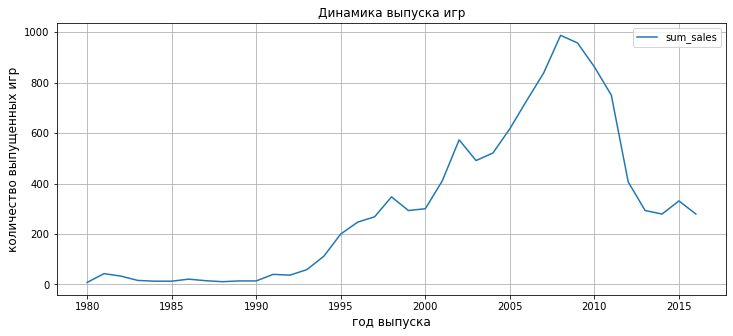

In [9]:
df_game.pivot_table(index = 'year_of_release', values = 'sum_sales', aggfunc = 'count').plot(grid = True, figsize = (12, 5))
plt.title('Динамика выпуска игр')
plt.xlabel('год выпуска', fontsize = 12)
plt.ylabel('количество выпущенных игр', fontsize = 12);

График отражает рост продаж с середины 90-х годов вплоть до года 2008, потом наблюдается резкий спад. Это скорее всего связано с финансовым кризисом в США, который потянул вниз не только строительный сектор, машиностроение, сферу услуг, но и игровую индустрию.

Определим платформы с наибольшими суммарными продажами.

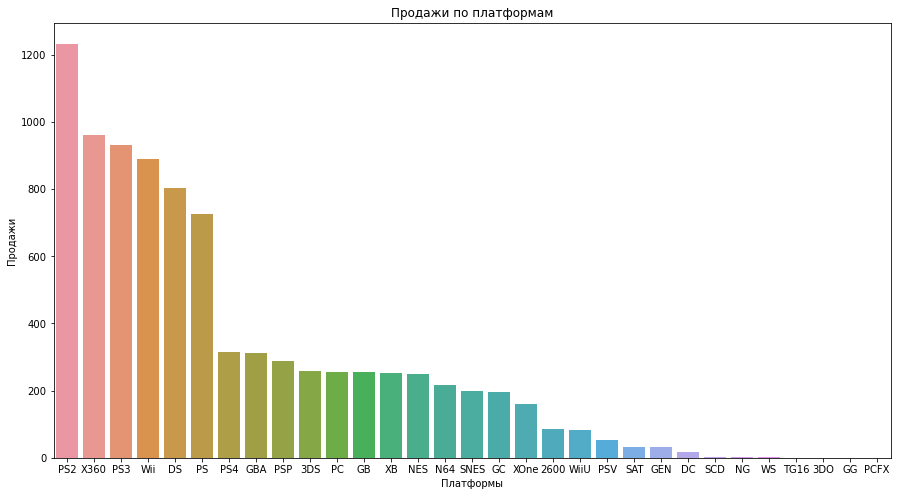

In [10]:
# формируем сводную таблицу
platform_sales = df.pivot_table(
    index = 'platform', values = 'sum_sales', aggfunc = 'sum').sort_values(by = 'sum_sales', ascending = False)

# строим диаграмму категориальных значений
plt.figure(figsize = (15,8))
sns.barplot(data = platform_sales, x = platform_sales.index, y = 'sum_sales').set(
    title = 'Продажи по платформам', xlabel = 'Платформы', ylabel = 'Продажи')
plt.show()

По графику видно, что больше всего продаж у платформы Playstation 2. К лидирующей группе можно добавить X360, PS3, Wii, DS и PS.

Построим распределение по годам суммарных продаж среди лидирующих платформ.

'PS2'

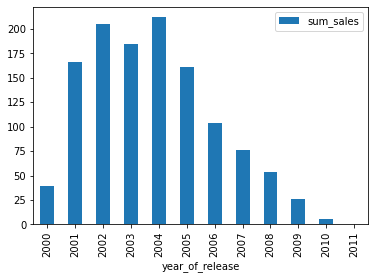

'X360'

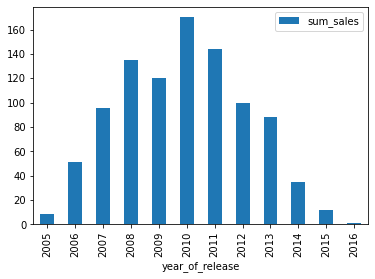

'PS3'

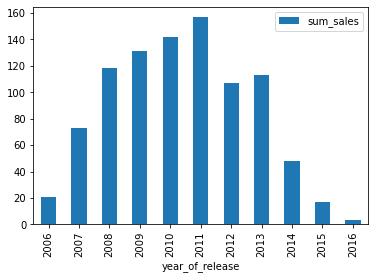

'Wii'

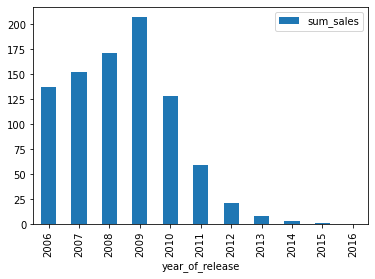

'DS'

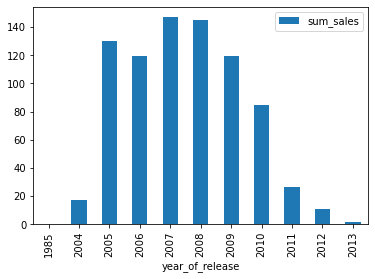

'PS'

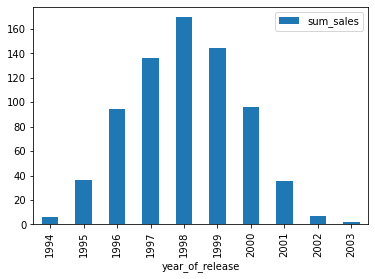

In [11]:
for value in platform_sales.index[:6]:
    display(value)
    df.query('platform==@value').pivot_table(
        index = 'year_of_release', values = 'sum_sales', aggfunc = 'sum').plot(
    kind = 'bar')
    plt.show()

Рассмотрим график каждой платформы:

**PS2**

Пик продаж игр на данную платформу приходится на 2002 - 2004 гг. Далее наблюдается спад на фоне набирающей обороты PS3 и полный выход с рынка к 2011 году. 
Период жизни 11 лет.

**X360**

Пик продаж на данную игровую платформу был чуть позже и приходится на 2010 год. Далее наблюдается чуть более резкий спад, чем взлет и полный выход с рынка к 2016 году. 
Период жизни 12 лет.

**PS3**

На смену PS2 пришла PS3, пик продаж игр на неё приходится на 2011 год. После 2011 продажи упали, но не так резко, как у предыдущих платформ. В 2013 году наблюдался рост по сравнению с 2012. Период жизни 11 лет.

**Wii**

Игровая приставка 7-го поколения от компании Nintendo, прямой конкурент Microsoft Xbox 360 и Sony PlayStation 3. На графике наблюдается быстрый рост, платформа вышла на пик продаж за 4 года. Максимальное количесво продаж зафиксировано в 2009 году. После наблюдается резкий спад. Период жизни 10 лет. Однако за последние три года было настолько мало продаж, что период жизни можно сократить до 7 лет.

**DS**

Корманная игровая консоль от компании Nintendo, пик продаж игр на неё приходится на 2007-2008 года. Высокие показатели спроса наблюдались с 2005 по 2010 год. После, резкое падение и выход с рынка к 2013 году. Период жизни 10 лет.

**PS**

График показывает плавный рост и плавный спад продаж после пика, который приходится на 1998 год. Полный выход с рынка в 2003 году. Период жизни 10 лет.

За актуальный возьмём период в 3 года с 2014 по 2016 включительно, т.к. он показывает существующее (актуальное) положение, в котором находится каждая из платформ. Это может быть рост, спад или же их отсутствие.

In [12]:
df_actual = df.query('year_of_release>=2014')

Определим платформы с наибольшими суммарными продажами в актуальный период:

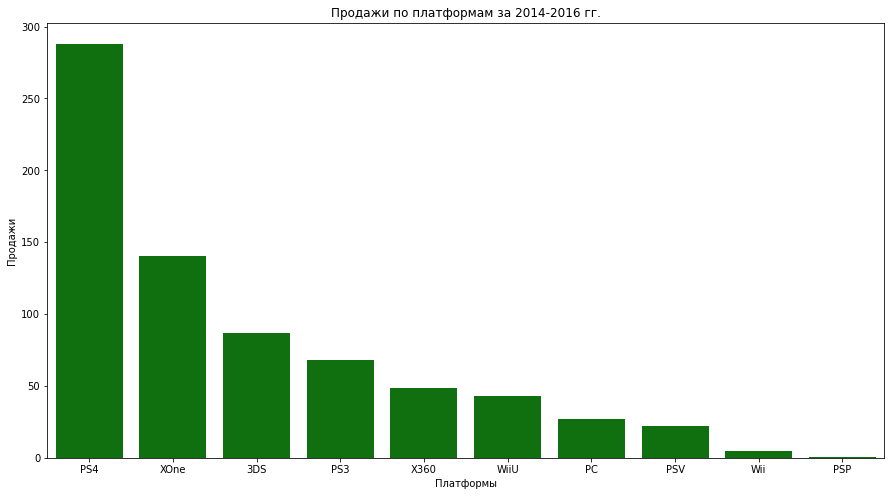

In [14]:
# формируем сводную таблицу
platform_sales_actual = df_actual.pivot_table(
    index = 'platform', values = 'sum_sales', aggfunc = 'sum').sort_values(by = 'sum_sales', ascending = False)

# строим диаграмму категориальных значений
plt.figure(figsize = (15,8))
sns.barplot(data = platform_sales_actual, x = platform_sales_actual.index, y = 'sum_sales', color = 'green').set(
    title = 'Продажи по платформам за 2014-2016 гг.', xlabel = 'Платформы', ylabel = 'Продажи')
plt.show()

Лидеры продаж остаются платформы от компаний Sony и Microsoft, только их уже представляют консоли нового поколения -  Sony PlayStation 4 и Microsoft Xbox One. Среди лидеров продаж появилась новая платформа - Nintendo 3DS, портативная игровая система производства Nintendo.

Определим, какие из представленных платформ растут, а какие падают по продажам.

'PS4'

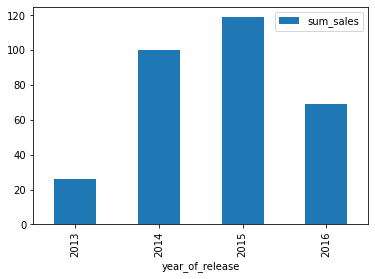

'XOne'

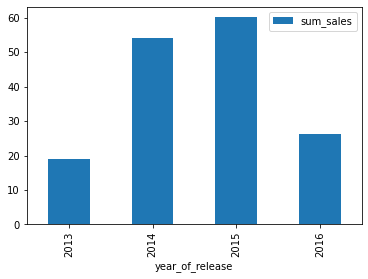

'3DS'

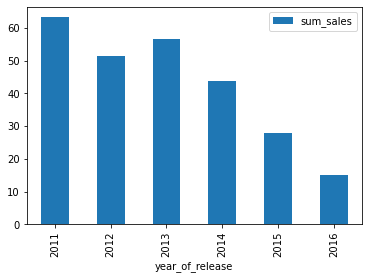

'PS3'

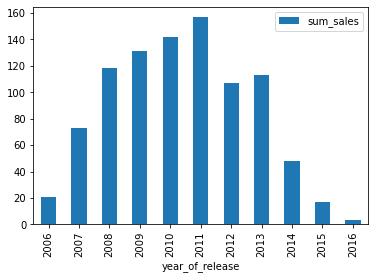

'X360'

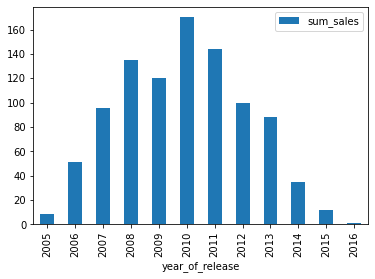

'WiiU'

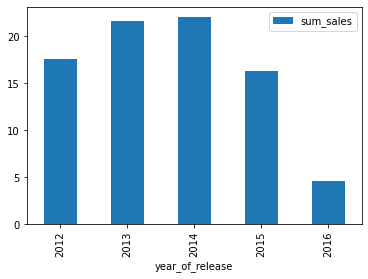

'PC'

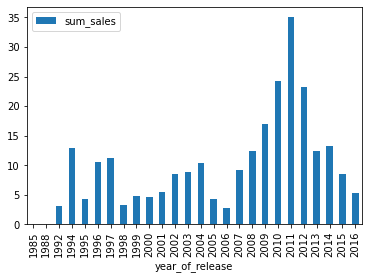

'PSV'

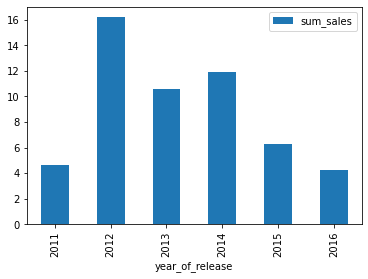

'Wii'

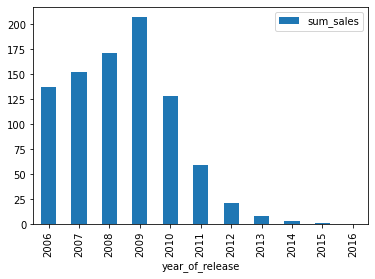

'PSP'

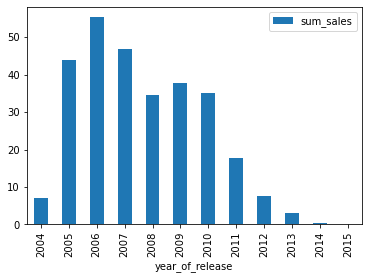

In [15]:
for value in platform_sales_actual.index:
    display(value)
    df.query('platform==@value').pivot_table(
        index = 'year_of_release', values = 'sum_sales', aggfunc = 'sum').plot(
    kind = 'bar')
    plt.show()

Все представленные игровые платформы прошли свой пик продаж и находятся на спаде. Тем не менее большинство платформ показывают хороший уровень продаж в 2016 году. Игровые платформы, которые находятся на грани выхода с рынка или те, которые уже вышли, использовать в дальнейшем анализе не имеет смысла. Это платформы - Wii и PSP. X360 и PS3 тоже уберем, т.к. им на смену пришли консоли нового поколения XOne и PS4.

In [16]:
df_actual = df_actual.query('platform not in ["Wii", "PSP", "X360", "PS3"]')

Построим график "ящик с усами" по глобальным продажам игр в разбивке по платформам.

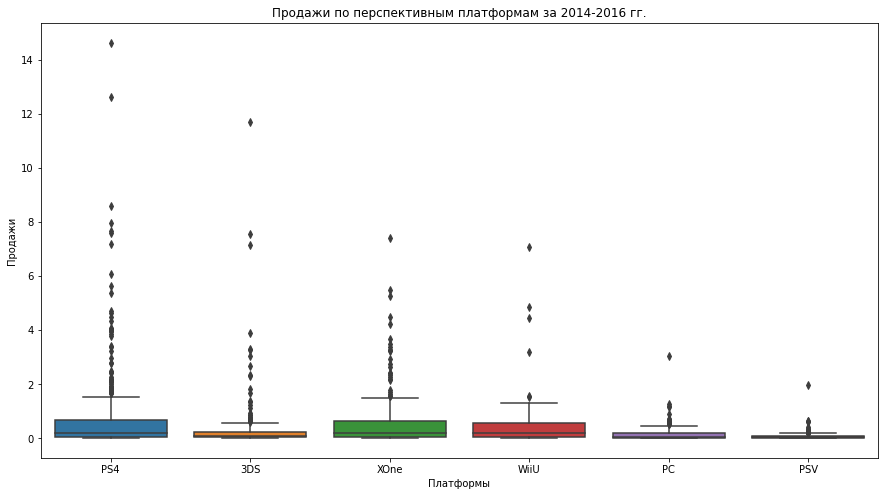

In [17]:
plt.figure(figsize = (15,8))
sns.boxplot(data = df_actual, x = 'platform', y = 'sum_sales').set(
    title = 'Продажи по перспективным платформам за 2014-2016 гг.', xlabel = 'Платформы', ylabel = 'Продажи')
plt.show()

Для наглядного отображения графика, преобразуем его:

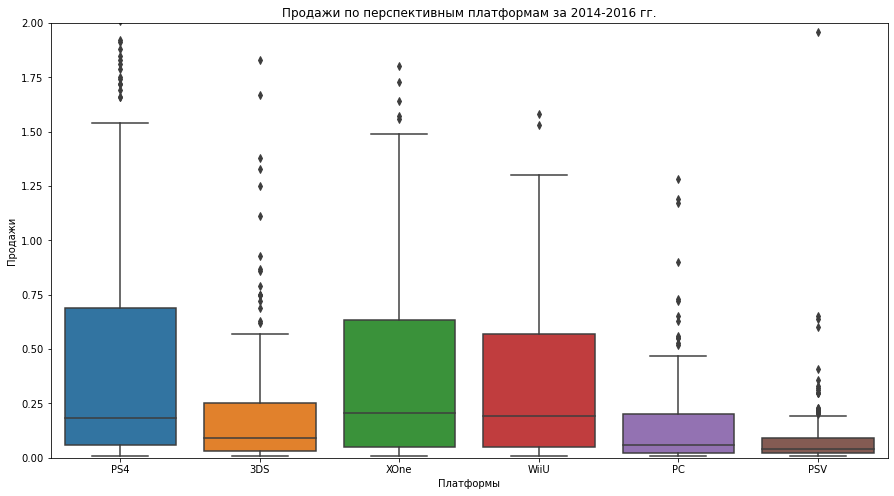

In [18]:
plt.figure(figsize = (15,8))
sns.boxplot(data = df_actual, x = 'platform', y = 'sum_sales').set(
    title = 'Продажи по перспективным платформам за 2014-2016 гг.', xlabel = 'Платформы', ylabel = 'Продажи')
plt.ylim([0,2])
plt.show()

Игровые платформы PS4, XOne, WiiU имееют схожее медианное значение. В целом можно сказать, что данные платформы успешны, большинство выпускаемых игр имеют хорошие продажи. Показатели платформ 3DS, PC и PSV значительно скромнее. 

Определим, как влияют на продажи внутри одной популярной платформы
отзывы пользователей и критиков. Построим диаграмму рассеяния и
посчитаем корреляцию между отзывами и продажами. 

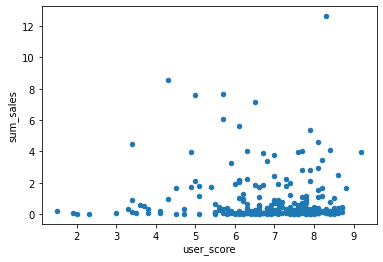

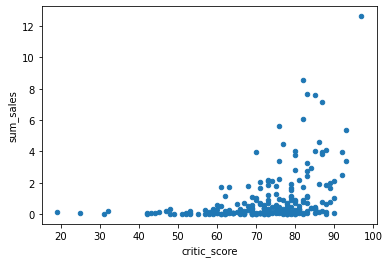

user_score     -0.040132
critic_score    0.402498
sum_sales       1.000000
Name: sum_sales, dtype: float64


In [19]:
popular_platform = df_actual.query('platform=="PS4"')
popular_platform[popular_platform['user_score'] != -1].plot(x = 'user_score', y = 'sum_sales', kind = 'scatter')
popular_platform.plot(x = 'critic_score', y = 'sum_sales', kind = 'scatter')
plt.show()
print(popular_platform[popular_platform['user_score'] != -1][['user_score','critic_score', 'sum_sales']].corr()['sum_sales'])

Из графика видно, что оценки критиков имеет незначительное влияние на продажи игр на платформе PS4. Мнение пользователей никакого воздействия на продажи не оказывает.

Проделаем тоже самое и для других популярных платформ:

3DS


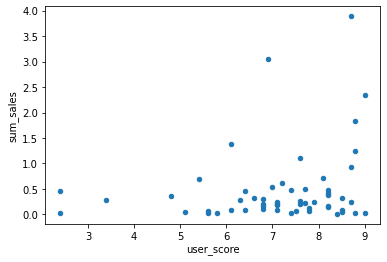

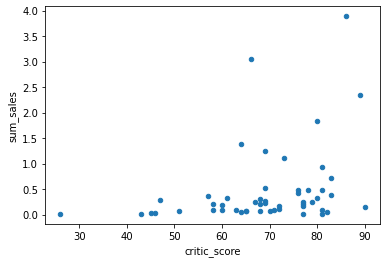

user_score      0.215193
critic_score    0.284686
sum_sales       1.000000
Name: sum_sales, dtype: float64
PC


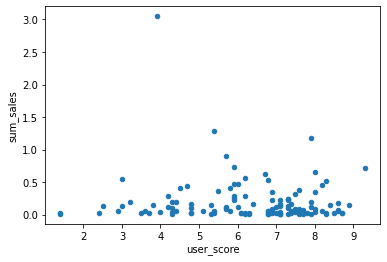

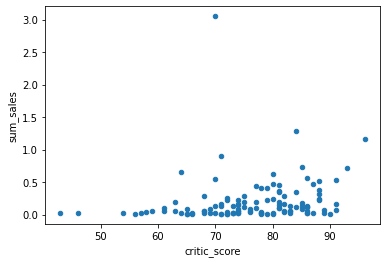

user_score     -0.071597
critic_score    0.174634
sum_sales       1.000000
Name: sum_sales, dtype: float64
PS4


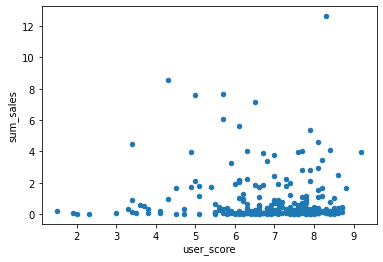

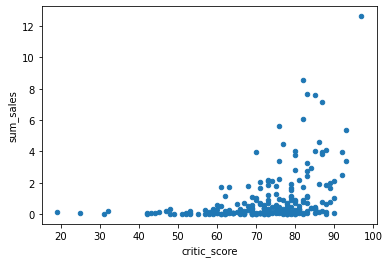

user_score     -0.040132
critic_score    0.402498
sum_sales       1.000000
Name: sum_sales, dtype: float64
PSV


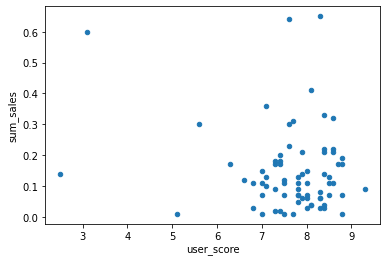

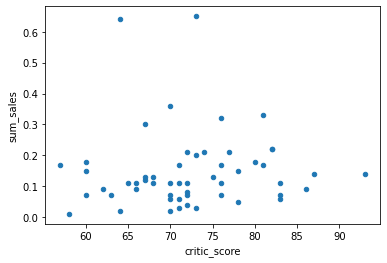

user_score     -0.168455
critic_score    0.041029
sum_sales       1.000000
Name: sum_sales, dtype: float64
WiiU


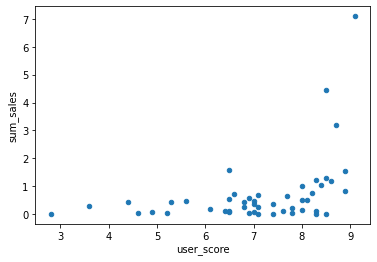

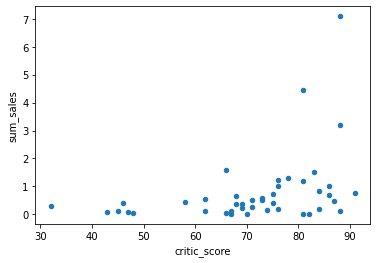

user_score      0.407926
critic_score    0.375640
sum_sales       1.000000
Name: sum_sales, dtype: float64
XOne


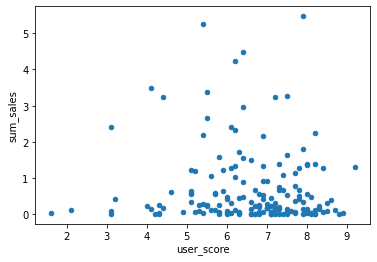

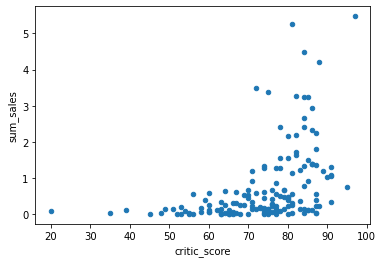

user_score     -0.070384
critic_score    0.424101
sum_sales       1.000000
Name: sum_sales, dtype: float64


In [20]:
for value, popular_platform in df_actual.groupby('platform'):
    print(value)
    popular_platform[popular_platform['user_score'] != -1].plot(x = 'user_score', y = 'sum_sales', kind = 'scatter')
    popular_platform.plot(x = 'critic_score', y = 'sum_sales', kind = 'scatter')
    plt.show()
    print(popular_platform[popular_platform['user_score'] != -1]
          [['user_score','critic_score', 'sum_sales']].corr()['sum_sales'])

В большинстве оценки на других платформам не оказывают воздействия на продажи. Слабое влияние наблюдается на платформе WiiU, причем коэффициент корреляция для оценок критиков и пользователей примерно равен. На платформе XOne также наблюдается слабое влияние критиков на успех продаж.

Посмотрим на общее распределение игр по жанрам:

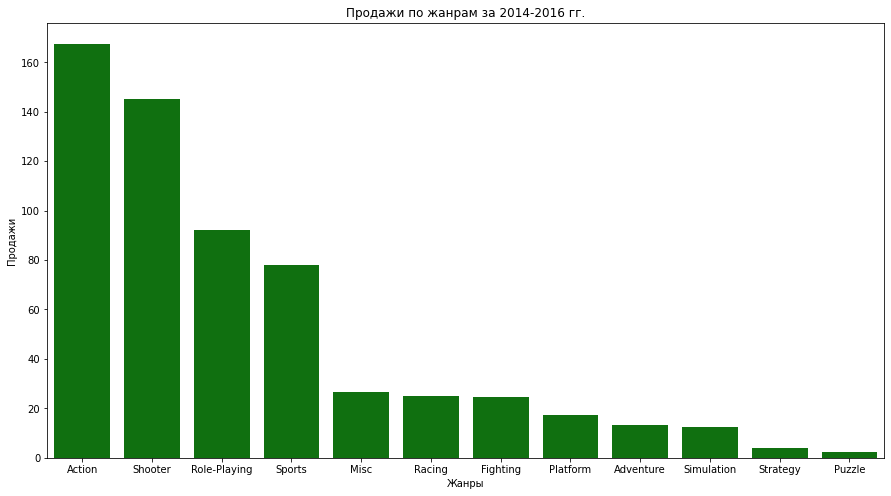

In [21]:
# формируем сводную таблицу
genre_sales_actual = df_actual.pivot_table(
    index = 'genre', values = 'sum_sales', aggfunc = 'sum').sort_values(by = 'sum_sales', ascending = False)

# строим диаграмму категориальных значений
plt.figure(figsize = (15,8))
sns.barplot(data = genre_sales_actual, x = genre_sales_actual.index, y = 'sum_sales', color = 'green').set(
    title = 'Продажи по жанрам за 2014-2016 гг.', xlabel = 'Жанры', ylabel = 'Продажи')
plt.show()

Отчетливо видны 3 группы "успешности" продаж. Больше всего игроки любят Action и Shooter. Это самые прибыльные жанры. Средние продажи показывают Role-Plating и Sports. В группу "низкие продажи" входят все остальные жанры, самые минимальные из них у Strategy и Puzzle.

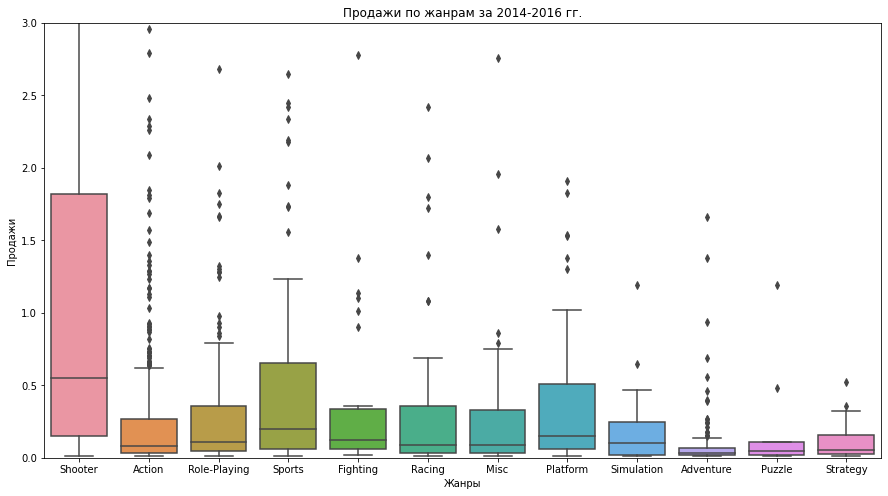

In [22]:
plt.figure(figsize = (15,8))
sns.boxplot(data = df_actual, x = 'genre', y = 'sum_sales').set(
    title = 'Продажи по жанрам за 2014-2016 гг.', xlabel = 'Жанры', ylabel = 'Продажи')
plt.ylim([0,3])
plt.show()

По медианным продажам лидирует Shooter. Хорошие продажи показывают Sports и Platform. Данные жанры успешны и имеют хорошие перспективы для дальнейшего успеха в продажах. Самые низкие показатели у Adventure и Puzzle, данные жанры не пользуются популярностью у игроков.

Составим портрет пользователя каждого региона.
Определим для пользователя каждого региона (NA, EU, JP):
- Самые популярные платформы (топ-5). 
- Самые популярные жанры (топ-5). 
- Влияет ли рейтинг ESRB на продажи в отдельном регионе?


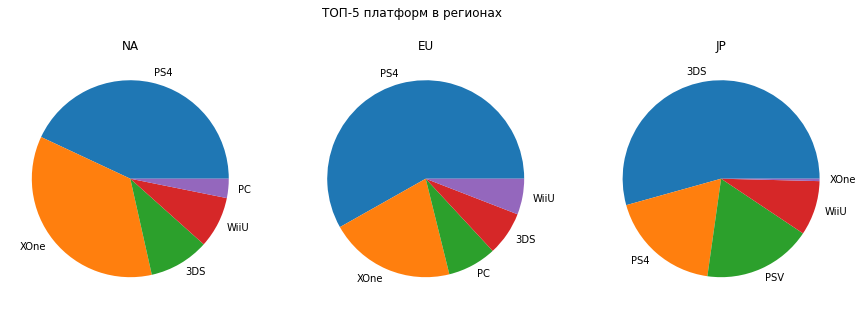

In [23]:
# задаем список регионов
contries = df_actual.columns[4:7]

# построим круговую диаграмму для каждого региона
fig, axs = plt.subplots(1,3,figsize = (15,5))
fig.suptitle('ТОП-5 платформ в регионах')
for i in range(3):
    # выберем 5 самых продающих платформ
    df_i = (df_actual.groupby('platform')[contries[i]].sum()
          .reset_index()
          .sort_values(contries[i], ascending = False, ignore_index = True).head(5))
    axs[i].pie(df_i[contries[i]], labels = df_i['platform'])
    
    # задаем названия регионов
    axs[i].set_title(df_i.columns[1].split('_')[0].upper())
plt.show()

Исходя из графиков, самые популярные платформы во всех регионах - PS4, XOne, 3DS, WiiU. Лидер в каждом регионе занимает около половины всего рынка. В Европе и Северной Америке больше предпочитают PS4, в Японии 3DS.

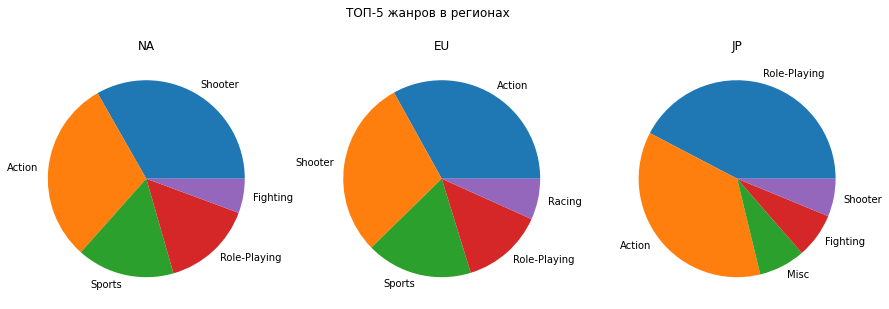

In [24]:
# построим круговую диаграмму для каждого региона
fig, axs = plt.subplots(1,3,figsize = (15,5))
fig.suptitle('ТОП-5 жанров в регионах')
for i in range(3):
    # выберем 5 самых продающих платформ
    df_i = (df_actual.groupby('genre')[contries[i]].sum()
          .reset_index()
          .sort_values(contries[i], ascending = False, ignore_index = True).head(5))
    axs[i].pie(df_i[contries[i]], labels = df_i['genre'])
    
    # задаем названия регионов
    axs[i].set_title(df_i.columns[1].split('_')[0].upper())
plt.show()

Мы видим подтверждение того, что игры жанра Action популярны во всем мире. Shooter тоже имеет большую популярность, однако в Японии к этому жанру не такой повышенный интерес. При этом игроки японского рынка больше всего любят поиграть в игры жанра Role-Playing, который популярен и в других регионах, но нет так, как в Японии. Доля продаж по жанрам в Европе и Северной Америке примерно одинаков, в Японии доля продаж лидеров выше.

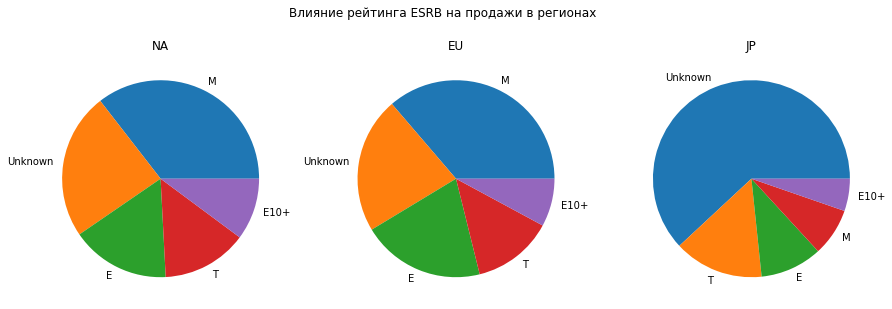

In [25]:
# построим круговую диаграмму для каждого региона
fig, axs = plt.subplots(1,3,figsize = (15,5))
fig.suptitle('Влияние рейтинга ESRB на продажи в регионах')
for i in range(3):
    # выберем 5 самых продающих платформ
    df_i = (df_actual.groupby('rating')[contries[i]].sum()
          .reset_index()
          .sort_values(contries[i], ascending = False, ignore_index = True).head(5))
    axs[i].pie(df_i[contries[i]], labels = df_i['rating'])
    
    # задаем названия регионов
    axs[i].set_title(df_i.columns[1].split('_')[0].upper())
plt.show()

В Европе и Северной Америке больше покупают игры с рейтингом - М (Для взрослых, не подходят для детей младше 17 лет). В Японии такого яркого перевеса в рейтинге не наблюдается, если не считать пропущенные значения. Остальные показатели рейтинга имеют примерно равные пропорции для всех регионов.

Итак, портреты пользователя каждого региона:
- Европа: Пользователь старше 17 лет, играющий на PS4 или XOne в игры жанра Action или Shooter.
- Северная Америка: Пользователь старше 17 лет, играющий на PS4 в игры жанра Action или Shooter.
- Япония: Пользователь старше 13 лет, играющий на 3DS в игры жанра Action или Role-Playing.

## Проверка гипотез

Проверим следующие гипотезы:
- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- Средние пользовательские рейтинги жанров Action (англ. «действие», экшенигры) и Sports (англ. «спортивные соревнования») разные.

Критический уровень статистической значимости возьмем равный 5%.

Определим нулевую и альтернативную гипотезы для проверки первой гипотезы:
- нулевая: средние пользовательские рейтинги платформ Xbox One и PC равны;
- альтернативная: средние пользовательские рейтинги платформ Xbox One и PC различаются;

Для проверки гипотезы используем t-тест:

In [26]:
df_actual = df_actual.dropna(subset = ['user_score']) # удаление пропусков в user_score
rating_xbox = df_actual.query('platform=="XOne"')['user_score'] # пользовательский рейтинг платформы XOne
rating_pc = df_actual.query('platform=="PC"')['user_score'] # пользовательский рейтинг платформы PC
results = st.ttest_ind(rating_xbox, rating_pc, equal_var = False)
alpha = 0.05
print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.6750910716582053
Не получилось отвергнуть нулевую гипотезу


Критический уровень статистической значимости ниже p-значения. У нас есть основания полагать, что средние пользовательские рейтинги платформ Xbox One и PC равны.

Проверим, отличаются ли средние пользовательские рейтинги жанров Action и Sports. 
Определим нулевую и альтернативную гипотезы:
- нулевая: средние пользовательские рейтинги жанров Action и Sports равны;
- альтернативная: средние пользовательские рейтинги жанров Action и Sports различаются;

In [27]:
#df_actual=df_actual.dropna(subset=['user_score']) # удаление пропусков в user_score
rating_action = df_actual.query('genre=="Action"')['user_score'] # пользовательский рейтинг жанра Action
rating_sports = df_actual.query('genre=="Sports"')['user_score'] # пользовательский рейтинг жанра Sports
results = st.ttest_ind(rating_action, rating_sports, equal_var = False)
alpha = 0.05
print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.005199012527941801
Отвергаем нулевую гипотезу


Критический уровень статистической значимости выше p-значения. Поэтому у нас нет оснований утверждать, что нулевая гипотеза верна, тем самым подтверждая, что средние пользовательские рейтинги жанров Action и Sports различаются.

## Общий вывод

Цель проекта - выявить определяющие успешность игры закономерности, которые позволят сделать ставку на потенциально популярный
продукт и спланировать рекламные кампании. В начале исследования была проведена подготовка данных к анализу, а именно, были заполнены пропуски, значения в таблицах приведены к нужному типу данных, посчитаны необходимые параметры с использованием сводных таблиц. Для выполнения задачи необходимо было определить актуальный период, используя который мы вычислили закономерности в продажах игровой индустрии. Также, путем проверки гипотез необходимо было определить, различается ли средние пользовательские рейтинги определенных игровых жанров и платформ. Проведенный анализ показал, что самая популярная платформа - PS4. Дополнительно, можно отметить платформы XOne и WiiU, которые хоть и прошли свой пик продаж, но еще имеют большой спрос среди игроков. Также стоит выделить лидера японского рынка - платформу 3DS, которая имеет хорошие показатели продаж. Самые популярные жанры Action и Shooter. В Японии лидер среди жанров - Role-Playing. В Европе и Северной Америке больше покупают игры с рейтингом - М (Для взрослых, не подходят для детей младше 17 лет). В Японии показатели рейтинга имеют примерно равные пропорции.
